# Plaicraft group project

*Kieran, John, Derek, William*
<br>project-003-12

In [1]:
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# **Introduction**


When it comes to machine learning, it is widely known that building an AI model requires a high volume of training data. In the context of PlaiCraft.ai, the researchers hope to collect 10,000 hours of multiplayer Minecraft gameplay for the purposes of training an AI agent. One challenge that naturally arises is the acquisition of a player base. More than that, the researchers need an *active* player base—a set of participants who will contribute a great deal of time playing on the server and producing training data. Culturally, it is assumed that video games like Minecraft appeal to a younger, male audience, but is this accurate? Some recent research suggests that video games are garnering a wider appeal, fostering player bases across a variety of previously underrepresented demographics (Engelstätter & Ward, 2022). That said, research surrounding the demographics of particular games, such as Mincraft, is limited. As a result, it is unclear which kinds of PlaiCraft.ai players will contribute the most data. Likewise, it is unclear which kinds of players should be targeted in recruiting efforts for the research project.

This predictive analysis aims to answer the following question: which age range(s) contribute the most playtime on the PlaiCraft Minecraft server? In answering this question, it is possible to infer a potential player's contributions, and thus make a informed decision on which demographics to target.

To achieve this, we will use the dataframe `players.csv` containing information on a sample of PlaiCraft players. <br>

### Data Description of `players.csv`:

In this file, each row represents one observation. There is also one row for the variable names. Thus, the total number of observations is the total number of rows minus one: 197 - 1 = 196. Below is a comprehensive table describing the variables of this dataframe:

|Variable Name|Meaning|Type|Issues|
|----------|---------|-----------|------------|
|`experience`|Refers to the player's level of familiarity with the video game. On a scale from least experienced to most experienced, <br> The values are ordered as follows: <br> Noob -> Amateur -> Regular -> Pro -> Veteran.|\<chr>|No apparent issues.|
|`subscribe`|The status of a players subscription to the mailing list. TRUE indicates they are subscribed, and FALSE <br> indicates they are not.|\<lgl>|No apparent issues.|
|`hashedEmail`|The player's email address, encoded into a string of numbers and letters, likely for the purposes of maintaining the <br> player's privacy.|\<chr>|No apparent issues.|
|`played_hours`|The number of hours the player was online in the server, either actively playing or away from their keyboard.|\<dbl>|This variable is slightly ambiguous i.e., we do not know exactly what it is referring to. <br> It may be a measure of the time a player was online (playing and afk), or it may only refer <br> to the time a player was actively interacting with the game. In the case that it is the former, <br> there is an issue of face validity—is the metric really measuring what it aims to?
|`name`|The first name of the player.|\<chr>|Potential ethical concerns surrounding anonymity, but this has been mitigated by <br> omitting the players' surnames.|
|`gender`|The gender of the player.|\<chr>|There is clear lack of representation of certain genders, which may make it difficult to draw <br> well-informed conclusions about the relationship between these genders and other variables.|
|`age`|The provided age the player (in years :D)|\<dbl>|This variable has a similar issue to gender. Older age groups are severly underrepresented, <br> so it may be inaccurate to draw conclusions and predictions from such age groups|
|`individualId`|While the variable name may be read as individual identification, its meaning is still unclear, <br> especially given the absence of values and the variable type, which implies that the values are TRUE or FALSE.|\<lgl>|The variable name is readable, but it is not particularly informative.|
|`organizationName`|Possibly refers to whether or not the player is affiliated with an unspecified organization.|\<lgl>|No apparent issues.|

**Methodology** 

For our project, we will be analysing the `players.csv` data specifically.  Our goal in analysing this is to understand how specifically the factors: `age` and `gender` play into the general *playing time* on the server.  

We plan to determine "what *kinds* of players are most likely to contribute data.
We analyse this by looking at the independent variables listed above (i.e. "kinds of players"), and them plotting them along with their dependent variable results (i.e. data contribution, or in our case: playing time in hours)
We'll be using the file player.csv because it includes the critical variables for this analysis (played_hours and age) and focuses on total playing time rather than specific session times. 

In order to determine what kinds of players are most likely to contribute data, we will be using linear regression to predict played_hours using age. This will provide insight into the age of players that are most likely to contribute data to the study;  a higher total playing time will mean more data contributed to the study. 

Our reasoning for using linear regression over KNN regression is that the ladder falters when trying to predict beyond the range of the predictors in the training set. Also, KNN regression becomes slower as the dataset grows bigger. While players.csv is not very large, whith only around 200 observations, as Plaicraft continues to collect data, they may wish to perform more analysis on these larger datasets that they produce. Thus, we decided to use linear regression, which is not limited by performance issues.  

First, we will read the data. Since the file is a .csv file (comma separated value file), we will use the read_csv() function.

In [2]:
players <- read_csv('data/players.csv')

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Note that the data is already tidy. Each column is one variable, each row appears to be one observation, and each cell is one value. Furthermore, the column names are suitable and human-readable. Thus, no wrangling is required to achieve tidy data. That said, we will still be wrangling the data to keep only the variables that are relevant to this investigation. These variables are age and played_hours.

In [3]:
players_tidy <- players |>
    select(played_hours, age)

Next, To obtain a initial, general understanding of the shape of the data, we will plot played_hours vs age, coloring by gender using a scatterplot.

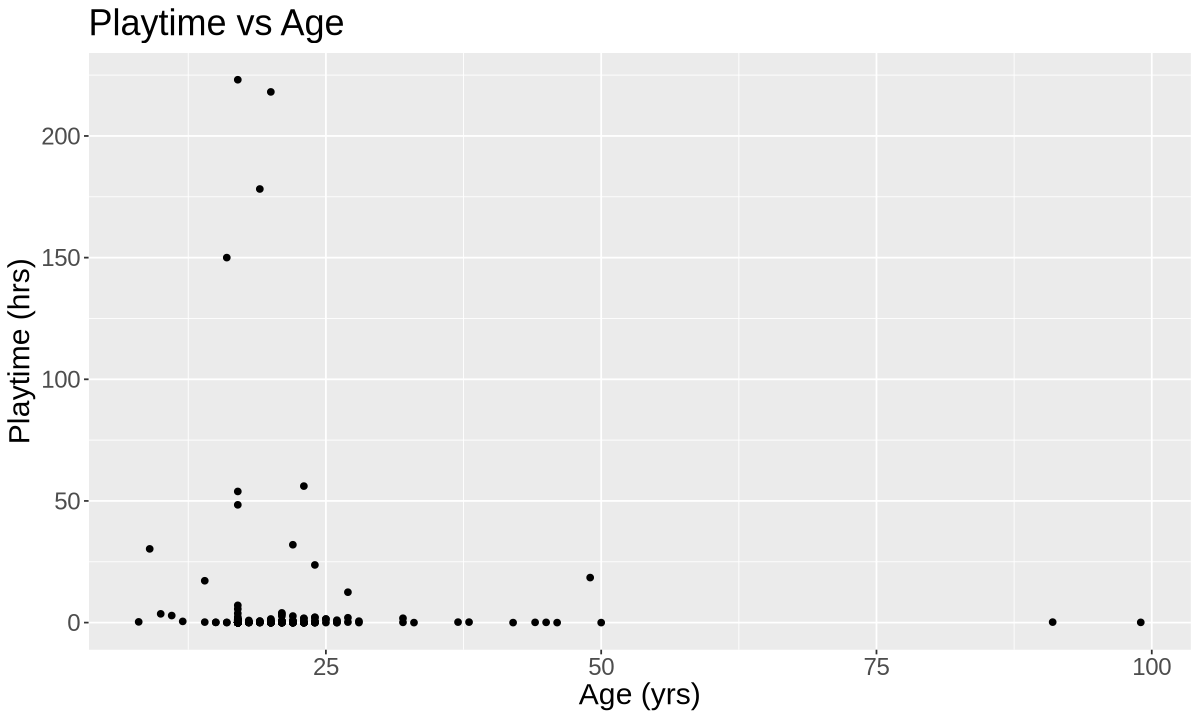

In [5]:
options(repr.plot.width = 10, repr.plot.height = 6)
initial_look_plot <- ggplot(players_tidy, aes(x = age, y = played_hours)) +
                        geom_point() +
                        labs(x = "Age (yrs)", y = "Playtime (hrs)", title = "Playtime vs Age") +
                        theme(text = element_text(size = 18))

initial_look_plot

Serveral issues become immediately apparent. First, the vast majority of the data points are in a clump at the bottom of the graph. This is due to the outlier values (with very high playtime) increasing the range of the y-axis, which causes the values of similarly low playtime being clumped together. To remedy this, we would ideally add a layer to ggplot which applies a logarithmic scale to the y-axis. However, given that we will be using the data for regression later on, we should instead apply a logarithmic transformation to the data itself. In this way, both the regression line and the plot will have the same transformations, leading to a better fit and meaningful results. Unfortunately, this means that the reader cannot interpret a playtime value of a given point directly from the plot, but it is a necessary step to ensure that the regression functions properly.

We will also add an alpha argument to the geom_point layer to mitigate any remaining overplotting.

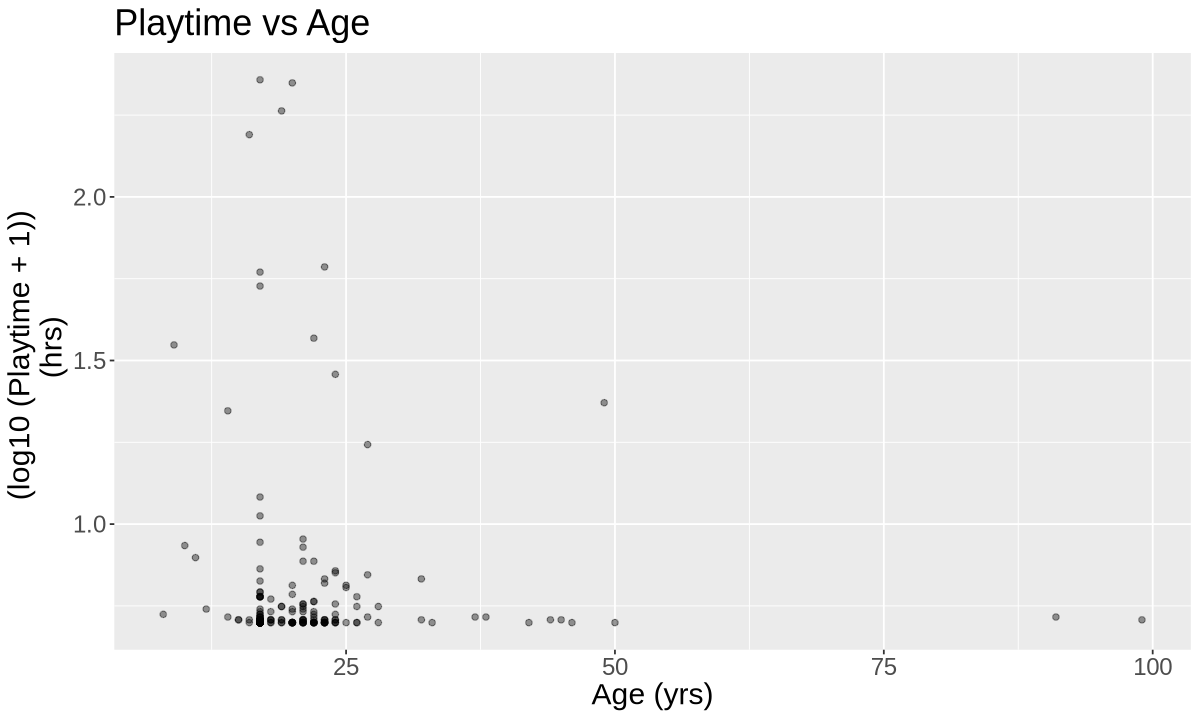

In [24]:
options(repr.plot.width = 10, repr.plot.height = 6)
players_tidy <- players_tidy |>
                mutate(log_played_hours = log10(played_hours + 1))
clean_plot <- ggplot(players_tidy, aes(x = age, y = log_played_hours)) +
                        geom_point(alpha = 0.4) +
                        scale_color_brewer(palette = "Set1") +
                        labs(x = "Age (yrs)", y = "(log10 (Playtime + 1)) \n (hrs)", title = "Playtime vs Age") +
                        theme(text = element_text(size = 18))

clean_plot

Now that we have visualized the data that we will use to train and test the predictive model, we can make an informed choice between regression models. First, there does not appear to be any linear relationship between the tranformed response variable and the explanatory variable. This would falsely imply an exponential relationship between age and playtime (since we took the log of playtime). In contrast, the k-nearest neaighbors model does not make any assumptions about the relationship. Furthermore, there are not a tremedous amount of observations present, meaning the k-nearest-neighbors (KNN) model will not take too long to run. With the KNN model, there is the issue of sensitivity to noise and outliers, but there are means of mitigating this issue, which we can implement. One way of ensuring a properly fitted, informative regression line is choosing the optimal k value. The k value refers to the number of nearest data points used to generate response variable value of a given point on the line. In choosing the best k value, we will avoid overfitting or underfitting our data. To achieve this, we will begin by splitting the data into two independent data frames using the initial_split function. The prop argument of 0.6 will allocate 60% of the players_tidy observations to a training set, and 40% to a testing set. Lastly, the strata argument will stratify the data allocated to each set according to played_hours. Roughly speaking, this ensures that each both sets have a similar number of observations with high and low playtime.

In [50]:
set.seed(1)

players_split <- initial_split(players_tidy, prop = 0.60, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)


In [51]:
players_recipe <- recipe(played_hours ~ age, data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression") 

players_workflow <- workflow() |>
    add_model(players_spec) |>
    add_recipe(players_recipe)

In [52]:
players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 3))

players_results <- players_workflow |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

k_min <- players_results |>
    filter(mean == min(mean)) |>
    select(neighbors) |>
    pull()

k_min

[1] 16

In [53]:
players_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
    set_engine("kknn") |>
    set_mode("regression")

players_fit <- workflow() |>
    add_model(players_spec_final) |>
    add_recipe(players_recipe) |>
    fit(data = players_training)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(16,     data, 5), kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 7.336476
Minimal mean squared error: 883.7132
Best kernel: rectangular
Best k: 16

To evaluate our model, we can then find the RMSPE (Root Mean Squared Percentage Error), or the distance between the predicted and actual values in the testing dataset. This can be done by using the `predict()` function on the testing dataset, combining the result with the testing dataset using `bind_cols()`, then using the `metrics()` function and passing `played_hours` as the `truth` argument and `.pred` as the `estimate` argument. The evaluation of this model will be in the discussion section.

In [54]:
players_rmspe <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse")

players_rmspe

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,25.86214


Since rmspe is measured in the same units as the response variable, we get a value of arond 26 hours played. 

In [55]:
players_test_results <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse") |>
    pull()

players_test_results

[1] 25.86214

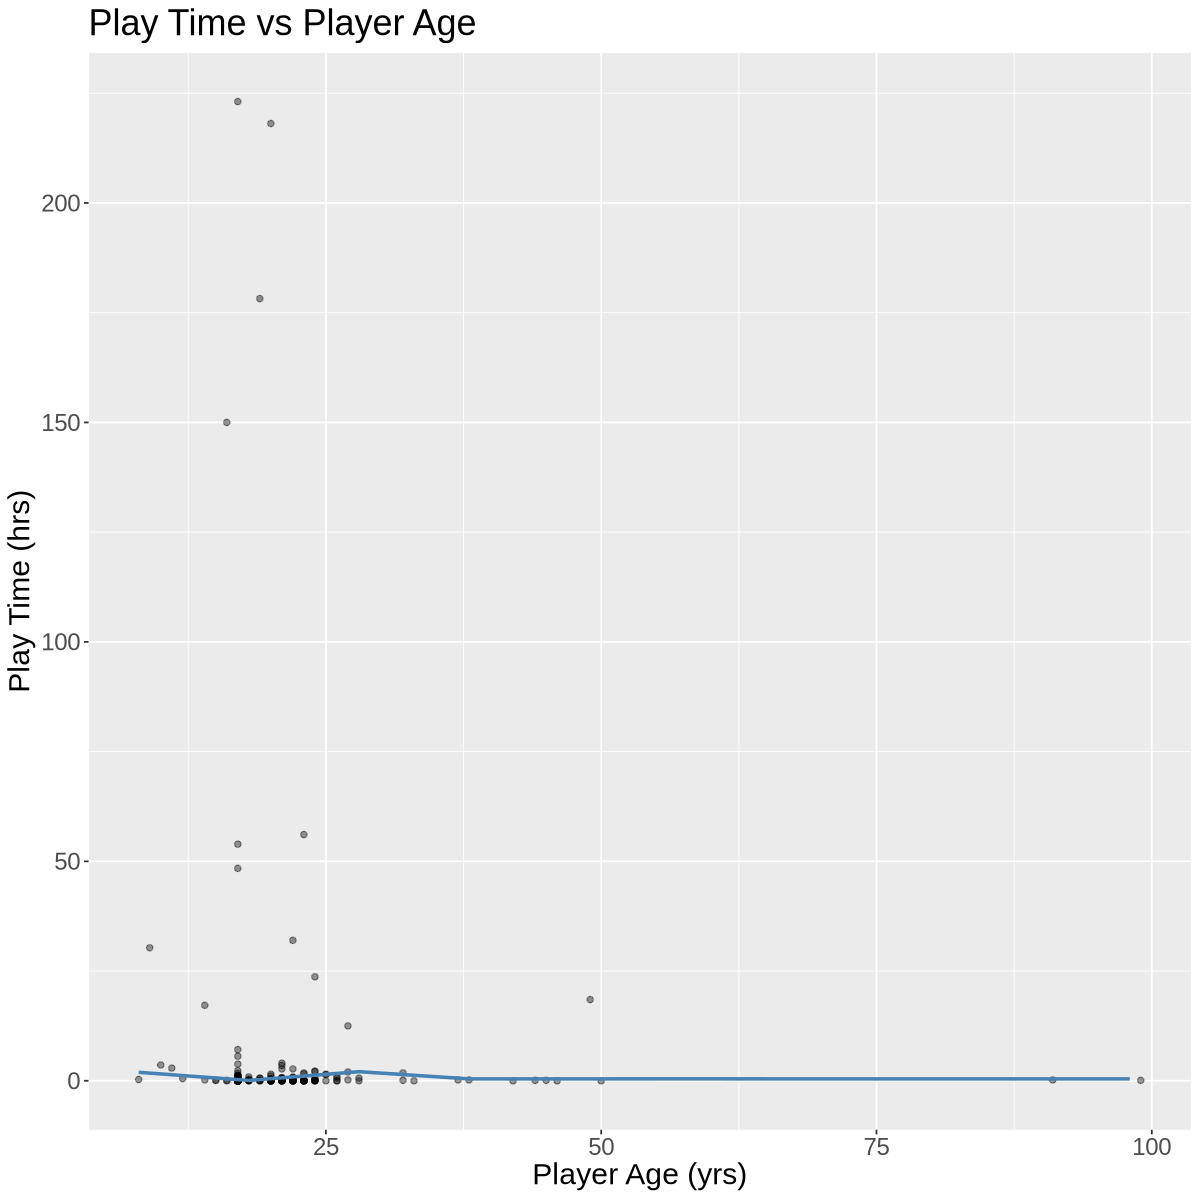

In [56]:
options(repr.plot.height = 10, repr.plot.width = 10)

players_prediction_grid <- tibble(
    age = seq(
        from = players_tidy |> select(age) |> min(),
        to = players_tidy |> select(age) |> max(),
        by = 10))

players_preds <- players_fit |>
    predict(players_prediction_grid) |>
    bind_cols(players_prediction_grid)

players_plot_line <- ggplot(players_tidy, aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
             mapping = aes(x = age, y = .pred),
             color = "steelblue",
             linewidth = 1) +
    labs(x = "Player Age (yrs)", y = "Play Time (hrs)", title = "Play Time vs Player Age") +
    theme(text = element_text(size = 18))

players_plot_line

# **Discussion**

**Analysing the Data**

From our exploration into the `players.csv` dataset we have found significant data and results.  These results provide information to ultimately help us make inferences about our question: "what *kinds* of players are most likely to contribute data?"

**Summary:**


Within our scatterplot depicting the relationship between **"age vs. playing time"**, there are multiple trends that we have observed, giving us insight into the player demographic of the Plaicraft server. The scatterplot revealed the average age range of players, which was observed to be between 13 and 25. This is also the range in which the greatest amount of data was contributed on the Plaicraft server. From this age range, a trend that was found is that age and playing time have a positive relationship until roughly 15 years of age, hitting a peak. After 15 years old, a negative relationship is formed, with play time decreasing for every age greater than 15 years old.

**Conclusion:**

From looking at the **"age vs. playing time" scatterplot**, it is easy to draw conclusions about what age group the Plaicraft server should target. By looking at the scatterplot, the general consensus is that players between the ages of 13-21 (teenagers to young adults) contribute the most amount of data on the server. This was in line with our expectations as we anticipated younger people would generally contribute more playing time on the Plaicraft server for two primary reasons. The first being that Minecraft is inherently familiar to players within this age bracket who have grown up with digital gaming as an important component of their lives. Moreover, individuals within this age range generally have fewer social and professional obligations, allowing more free time to play on the server. These two important factors create an optimal environment for people within this age bracket for server participation.
However, our linear regression model also raises questions about its validity and accuracy. By looking at the RMPSE value our model generated on the testing data of 25.33, we can draw some insights. In this context, 25.33 refers to playing time and is accurate within this model. Within the context of the plot, the x-axis encompasses ages ranging from 0 to 100, and the y-axis spans from 0 to 200 units, revealing a wide range of values a datapoint could occupy. Therefore, our relatively modest RMPSE of 25.33 shows our model is balanced between being overfitted and underfitted. This is important to note, as an overfitted model would show excessive sensitivity to training data noise, potentially generating misleading predictions, while an underfitted model would fail to capture the underlying trend

**Suggestions and Impacts of Results**

There are multiple impacts our findings could have towards the Plaicraft server. 
An example is allowing the research group to advertise to a general age group. By targeting ads to the age range who are likely to play on the server the most, Plaicraft can be able to reach the amass more players who will play their server for an extended time, aiding their goal in data collection for their AI model. 
This idea of targetted advertising plays into all factors: age, gender, experience, geography, etc.  Therefore it may benefit the researchers to invest time into analysing those variables as well and eventually advertising to them.

Further explorations into this data could range from regions of the world (something not present in `players.csv`) or even reason for playing (could also help with targeted advertising).  

